In [9]:
import nlp as nlp
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
There is no [win32] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\abhej\.wdm\drivers\chromedriver\win32\96.0.4664.45]
C:\Users\abhej\AppData\Local\Temp/ipykernel_5424/2178917076.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [2]:
from selenium import webdriver
import csv
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
import numpy as np


#NLTK libraries
import re
import string

#Visualization libraries
import matplotlib.pyplot as plt

import seaborn as sns
from textblob import TextBlob

%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [3]:
def get_url(ASIN):

    template = 'https://www.amazon.com/product-reviews/{}/ref=cm_cr_getr_d_paging_btm_next_3?sortBy=recent'
    url = template.format(ASIN)
    url += '&pageNumber={}'

    return url

In [4]:
def extract_record(item):


    profile = item.find('span', 'a-profile-name').text.strip()
    rating = item.find('div','a-row').text.strip()[len(profile):len(profile)+3]
    title = item.find('a','a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold').text.strip()

    try:
        product_size = item.find('a','a-size-mini a-link-normal a-color-secondary').text.strip()
        verified_purchase = item.find('span','a-size-mini a-color-state a-text-bold').text.strip()
    except AttributeError:
        product_size = ''
        verified_purchase = ''
    review = item.find('span','a-size-base review-text review-text-content').text.strip()
    review_date = item.find('span','a-size-base a-color-secondary review-date').text.strip()
    date = review_date[review_date.index('on')+3:]


    result = (title, profile, date, rating,  product_size, verified_purchase, review)

    return result

In [11]:
def main(ASIN):

    # startup the webdriver
    options = Options()
    # open chrome in incognito mode
    options.add_argument("--incognito")

    # this option will run a code without opening chrome
    #options.add_argument("--headless")

    # my chrome driver location. change it accordingly
    driver = webdriver.Chrome(executable_path='C:/Windows/System32/chromedriver.exe', options = options)


    records = []
    url = get_url(ASIN)

    for page in range(1, 11):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('div', {'class': 'a-section review aok-relative'})
        for item in results:
            record = extract_record(item)
            if record:
                records.append(record)


    driver.close()

    # save data to csv file
    with open(ASIN +'.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Title', 'Profile', 'Date', 'Rating', 'ProductSize', 'Verified_Purchase', 'Review'])
        writer.writerows(records)

In [13]:
ASINs = {'B08B9SGGRS'}
for ASIN in ASINs:
    main(ASIN)

C:\Users\abhej\AppData\Local\Temp/ipykernel_5424/2990026580.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Windows/System32/chromedriver.exe', options = options)


AttributeError: 'NoneType' object has no attribute 'text'

C:\Users\abhej\AppData\Local\Temp/ipykernel_5424/2990026580.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Windows/System32/chromedriver.exe', options = options)


AttributeError: 'NoneType' object has no attribute 'text'

In [20]:
ASINs = {'B08N3J7GJ8'}
for ASIN in ASINs:
    main(ASIN)

C:\Users\abhej\AppData\Local\Temp/ipykernel_5424/2990026580.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Windows/System32/chromedriver.exe', options = options)


In [21]:
ASINs = {'B08N2MSSZY'}
for ASIN in ASINs:
    main(ASIN)

C:\Users\abhej\AppData\Local\Temp/ipykernel_5424/2990026580.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Windows/System32/chromedriver.exe', options = options)


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("B08B9SGGRS.csv")

In [6]:
df

,Title,Profile,Date,Rating,ProductSize,Verified_Purchase,Review
0,Edge wrap seems more of a gimick than a useful...,carrie karchin,"December 9, 2021",3.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I bought this moto edge to replace my moto x4....
1,No good,Ashley,"December 6, 2021",1.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,No good
2,Nice but edges are sometimes a problem,Rosalind,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,"I like the phone, but the rounded side edges c..."
3,I still haven't gotten the correct case,Amazon Customer,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,Am still having a little challenge.. can't fin...
4,Fantastic...Thing...,Worldreviewed,"December 2, 2021",5.0,NaN,NaN,"All, I had purchased this phone form T-Mobile ..."
...,...,...,...,...,...,...,...
95,"Design is to admire, but hinge is too noisy",Mr B,"May 5, 2021",3.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,"Nice phone, but creaks when opening and closin..."
96,es lo que esperaba,Humberto Olmos,"May 3, 2021",5.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,excelente producto y muy rápida entrega
97,great phone and fantastic camera,nigel,"May 2, 2021",5.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,great phone and fantastic camera
98,Motorola what happened,ALLAN,"May 2, 2021",1.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I am not at all impressed the camera is decent...


In [7]:
df1 = pd.read_csv("B08N2MSSZY.csv")

In [8]:
df2 = pd.read_csv("B08N3J7GJ8.csv")

In [24]:
df1

,Title,Profile,Date,Rating,ProductSize,Verified_Purchase,Review
0,None,TT,"December 9, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,"Great phone! good battery life, exellent camer..."
1,Still learning,Frank B. Felty,"December 7, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,It's really too early to send this survey out ...
2,Camera quality is perfection!,Naomi,"December 7, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,Had this phone for months now and and my husba...
3,Come on its the ultra,J-FIZZLE,"December 5, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,I mean what do you expect except what you buy ...
4,I recommend getting an apple phone,Kimberly Harrell,"December 5, 2021",1.0,NaN,NaN,If you value talking to people and being able ...
...,...,...,...,...,...,...,...
95,Amazing phone but buy a super fast charger,Wes Techie,"July 21, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,Moved to the 21 ultra from an unlocked S10. T...
96,Good phone,pradeep datla,"July 20, 2021",4.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,High quality phone with lot of software issues...
97,Beat phone I ever had,Justice Harris,"July 16, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,Phone is fire
98,Cut through the drama,Sassy chassis,"July 15, 2021",5.0,Color: Phantom BlackSize: 128GBStyle: S21 Ultra,Verified Purchase,I had been shopping this phone make and model ...


In [25]:
df2

,Title,Profile,Date,Rating,ProductSize,Verified_Purchase,Review
0,Would return if I could,Jason Isbell,"December 7, 2021",1.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,"Constant problems. Sim card not recognized, t..."
1,No charging block,Dave A.,"November 12, 2021",Top,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,"C'mon Samsung. A high priced phone, and you ch..."
2,Camera stopped working after 5 months,Fernando @ Happy Code Club,"November 5, 2021",2.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,The camera stopped working after a few months ...
3,I just got it set up yesterday but so far I a...,Amazon Customer,"October 24, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Very nice phone
4,Camera is about the only good feature,Christian Hess,"October 15, 2021",3.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Battery life is 1 day changed to no port for h...
...,...,...,...,...,...,...,...
95,Great phone,N. Woeltje,"March 9, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Love my new phone. Did not activate fingerprin...
96,Samsung done it again,Louis Wright,"March 8, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Very smooth phone. Camera is great and the scr...
97,"It has a plastic back, this is unacceptable bu...",Wolffe,"February 28, 2021",1.0,NaN,NaN,Even many budget phones over the past few year...
98,A Must Buy!,N'Tajavas Williams,"February 22, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,I Love This Phone but the only problem I got i...


In [9]:
frames = [df, df1, df2]

result = pd.concat(frames)

In [10]:
result

,Title,Profile,Date,Rating,ProductSize,Verified_Purchase,Review
0,Edge wrap seems more of a gimick than a useful...,carrie karchin,"December 9, 2021",3.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I bought this moto edge to replace my moto x4....
1,No good,Ashley,"December 6, 2021",1.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,No good
2,Nice but edges are sometimes a problem,Rosalind,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,"I like the phone, but the rounded side edges c..."
3,I still haven't gotten the correct case,Amazon Customer,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,Am still having a little challenge.. can't fin...
4,Fantastic...Thing...,Worldreviewed,"December 2, 2021",5.0,NaN,NaN,"All, I had purchased this phone form T-Mobile ..."
...,...,...,...,...,...,...,...
95,Great phone,N. Woeltje,"March 9, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Love my new phone. Did not activate fingerprin...
96,Samsung done it again,Louis Wright,"March 8, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Very smooth phone. Camera is great and the scr...
97,"It has a plastic back, this is unacceptable bu...",Wolffe,"February 28, 2021",1.0,NaN,NaN,Even many budget phones over the past few year...
98,A Must Buy!,N'Tajavas Williams,"February 22, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,I Love This Phone but the only problem I got i...


In [11]:
result = result.reset_index()

In [14]:
result = result.drop(labels="index", axis=1)

KeyError: "['index'] not found in axis"

In [13]:
result

,Title,Profile,Date,Rating,ProductSize,Verified_Purchase,Review
0,Edge wrap seems more of a gimick than a useful...,carrie karchin,"December 9, 2021",3.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I bought this moto edge to replace my moto x4....
1,No good,Ashley,"December 6, 2021",1.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,No good
2,Nice but edges are sometimes a problem,Rosalind,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,"I like the phone, but the rounded side edges c..."
3,I still haven't gotten the correct case,Amazon Customer,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,Am still having a little challenge.. can't fin...
4,Fantastic...Thing...,Worldreviewed,"December 2, 2021",5.0,NaN,NaN,"All, I had purchased this phone form T-Mobile ..."
...,...,...,...,...,...,...,...
295,Great phone,N. Woeltje,"March 9, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Love my new phone. Did not activate fingerprin...
296,Samsung done it again,Louis Wright,"March 8, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Very smooth phone. Camera is great and the scr...
297,"It has a plastic back, this is unacceptable bu...",Wolffe,"February 28, 2021",1.0,NaN,NaN,Even many budget phones over the past few year...
298,A Must Buy!,N'Tajavas Williams,"February 22, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,I Love This Phone but the only problem I got i...


In [15]:
#Creating a copy
process_reviews=result.copy()

#Checking for null values
process_reviews.isnull().sum()

Title                 0
Profile               0
Date                  0
Rating                0
ProductSize          46
Verified_Purchase    46
Review                2
dtype: int64

In [16]:
#filling in missing values
process_reviews['Review']=process_reviews['Review'].fillna('Missing')

In [17]:
#combining reviews and title
process_reviews['reviews']=process_reviews['Review']+process_reviews['Title']
process_reviews=process_reviews.drop(['Review', 'Title'], axis=1)
process_reviews.head()

,Profile,Date,Rating,ProductSize,Verified_Purchase,reviews
0,carrie karchin,"December 9, 2021",3.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I bought this moto edge to replace my moto x4....
1,Ashley,"December 6, 2021",1.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,No goodNo good
2,Rosalind,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,"I like the phone, but the rounded side edges c..."
3,Amazon Customer,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,Am still having a little challenge.. can't fin...
4,Worldreviewed,"December 2, 2021",5.0,NaN,NaN,"All, I had purchased this phone form T-Mobile ..."


In [22]:
process_reviews. dtypes

Profile              object
Date                 object
Rating               object
ProductSize          object
Verified_Purchase    object
reviews              object
dtype: object

In [43]:
process_reviews['Rating'] = process_reviews['Rating'].map(str)

In [44]:
conditions = [
    (process_reviews['Rating'] == "1.0"),
    (process_reviews['Rating'] == "2.0"),
    (process_reviews['Rating'] == "3.0"),
    (process_reviews['Rating'] == "4.0"),
    (process_reviews['Rating'] == "5.0") | (process_reviews['Rating'] == "Top")
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
process_reviews['category'] = np.select(conditions, values)

In [45]:
process_reviews

,Profile,Date,Rating,ProductSize,Verified_Purchase,reviews,category
0,carrie karchin,"December 9, 2021",3.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I bought this moto edge to replace my moto x4....,3
1,Ashley,"December 6, 2021",1.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,No goodNo good,1
2,Rosalind,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,"I like the phone, but the rounded side edges c...",4
3,Amazon Customer,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,Am still having a little challenge.. can't fin...,4
4,Worldreviewed,"December 2, 2021",5.0,NaN,NaN,"All, I had purchased this phone form T-Mobile ...",5
...,...,...,...,...,...,...,...
295,N. Woeltje,"March 9, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Love my new phone. Did not activate fingerprin...,5
296,Louis Wright,"March 8, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Very smooth phone. Camera is great and the scr...,5
297,Wolffe,"February 28, 2021",1.0,NaN,NaN,Even many budget phones over the past few year...,1
298,N'Tajavas Williams,"February 22, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,I Love This Phone but the only problem I got i...,5


In [46]:
process_reviews['category'].value_counts()

5    144
1     63
3     33
4     33
2     27
Name: category, dtype: int64

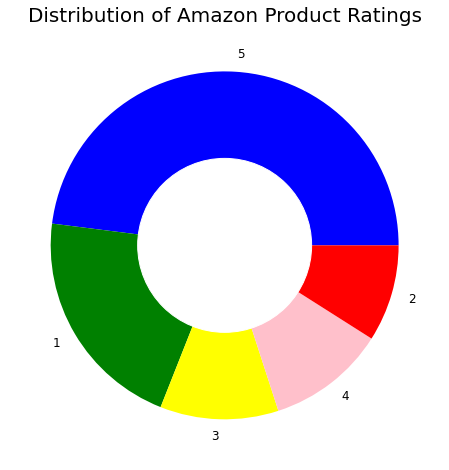

In [49]:
ratings = process_reviews['category'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["blue", "green", 'yellow', "pink", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [54]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [57]:
process_reviews = process_reviews.iloc[: , :-3]

In [58]:
process_reviews

,Profile,Date,Rating,ProductSize,Verified_Purchase,reviews,category
0,carrie karchin,"December 9, 2021",3.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,I bought this moto edge to replace my moto x4....,3
1,Ashley,"December 6, 2021",1.0,Style: RAZR 5GColor: Liquid Mercury,Verified Purchase,No goodNo good,1
2,Rosalind,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,"I like the phone, but the rounded side edges c...",4
3,Amazon Customer,"December 4, 2021",4.0,Style: Motorola EdgeColor: Solar Black,Verified Purchase,Am still having a little challenge.. can't fin...,4
4,Worldreviewed,"December 2, 2021",5.0,NaN,NaN,"All, I had purchased this phone form T-Mobile ...",5
...,...,...,...,...,...,...,...
295,N. Woeltje,"March 9, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Love my new phone. Did not activate fingerprin...,5
296,Louis Wright,"March 8, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,Very smooth phone. Camera is great and the scr...,5
297,Wolffe,"February 28, 2021",1.0,NaN,NaN,Even many budget phones over the past few year...,1
298,N'Tajavas Williams,"February 22, 2021",5.0,Color: Phantom VioletSize: 128GBStyle: S21,Verified Purchase,I Love This Phone but the only problem I got i...,5


In [60]:
newdata = process_reviews[['Date', 'category', 'reviews']]

In [61]:
data = newdata.copy()
data = data.reviews
all_rows = []

for row in data:
    all_rows.append(row)

words = list()
for row in all_rows:
    sents = row.split()
    for w in sents:
        words.append(w)

In [62]:
#removing punctuations and fullstops
punct = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in words]
wordsnew = []
for word in punct:
    if word != '':
        wordsnew.append(word)

In [63]:
#doing stemming
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
stem = []
for word in wordsnew:
    stem.append(s_stemmer.stem(word))

In [72]:
#stopword removal
import spacy
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()
stprmv = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stprmv.append(word)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [73]:
data2 = pd.DataFrame(stprmv)
data2 = data2[0].value_counts()

In [74]:
#frequency dist
from nltk.probability import FreqDist
frequency = FreqDist()
for words in data2:
    frequency[words] += 1

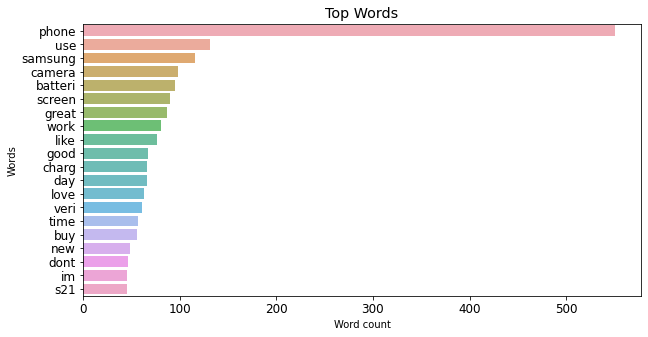

In [75]:
data2 = data2[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data2.values, data2.index, alpha=0.8)
plt.title('Top Words')
plt.ylabel('Words', fontsize=10)
plt.xlabel('Word count', fontsize=10)
plt.show()

In [78]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data2 = newdata.copy()
data2['scores'] = data2['reviews'].apply(lambda tweet: sia.polarity_scores(tweet))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abhej\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
# scores separated
data2['compound'] = data2['scores'].apply(lambda d: d['compound'])
data2['sentiment'] = data2['compound'].apply(lambda val: 'pos' if val > 0 else ('neu' if val == 0 else 'neg'))
data2['sentiment'].value_counts()

pos    187
neg     80
neu     33
Name: sentiment, dtype: int64

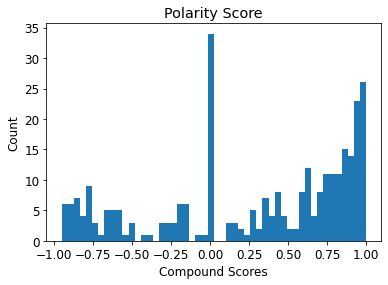

In [80]:
data2['compound'].plot(
    kind='hist',
    bins=50)
plt.xlabel('Compound Scores')
plt.ylabel('Count')
plt.title('Polarity Score')
plt.show()

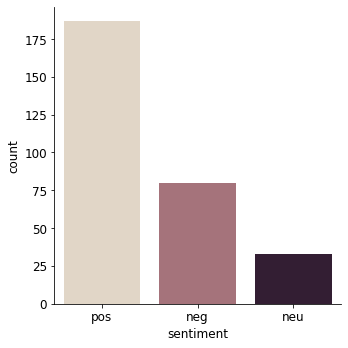

In [82]:
sns.catplot(x="sentiment", kind="count", palette="ch:.25", data=data2)

In [83]:
data2

,Date,category,reviews,scores,compound,sentiment
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos
...,...,...,...,...,...,...
295,"March 9, 2021",5,Love my new phone. Did not activate fingerprin...,"{'neg': 0.044, 'neu': 0.848, 'pos': 0.108, 'co...",0.5423,pos
296,"March 8, 2021",5,Very smooth phone. Camera is great and the scr...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.9558,pos
297,"February 28, 2021",1,Even many budget phones over the past few year...,"{'neg': 0.118, 'neu': 0.846, 'pos': 0.036, 'co...",-0.8519,neg
298,"February 22, 2021",5,I Love This Phone but the only problem I got i...,"{'neg': 0.087, 'neu': 0.708, 'pos': 0.205, 'co...",0.7035,pos


In [85]:
#Creating new data frames for all sentiments (positive, negative and neutral)
negative = data2[data2["sentiment"]=="neg"]
positive = data2[data2["sentiment"]=="pos"]
neutral = data2[data2["sentiment"]=="neu"]

In [86]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(data2,"sentiment")

,Total,Percentage
pos,187,62.33
neg,80,26.67
neu,33,11.00


In [95]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#Function to Create Wordcloud
def create_wordcloud(text):
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


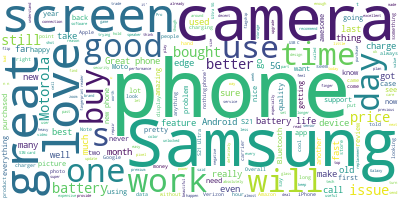

In [96]:
#Creating wordcloud for positive sentiment
create_wordcloud(positive["reviews"].values)

In [ ]:
#Topic Modelling

In [105]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
data2['tokenized'] = data2["reviews"].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0    I bought this moto edge to replace my moto x4....
1                                       No goodNo good
2    I like the phone, but the rounded side edges c...
3    Am still having a little challenge.. can't fin...
4    All, I had purchased this phone form T-Mobile ...
Name: reviews, dtype: object

In [106]:
data2.head()

,Date,category,reviews,scores,compound,sentiment,tokenized
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,..."


In [107]:
#to lowercase
data2['lower'] = data2['tokenized'].apply(lambda x: [word.lower() for word in x])
data2.head()

,Date,category,reviews,scores,compound,sentiment,tokenized,lower
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]","[no, goodno, good]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, ,, but, the, rounded, si..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,...","[all, ,, i, had, purchased, this, phone, form,..."


In [109]:
punc = string.punctuation
data2['no_punc'] = data2['lower'].apply(lambda x: [word for word in x if word not in punc])
data2.head()

,Date,category,reviews,scores,compound,sentiment,tokenized,lower,no_punc
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]","[no, goodno, good]","[no, goodno, good]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, but, the, rounded, side,..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,...","[all, ,, i, had, purchased, this, phone, form,...","[all, i, had, purchased, this, phone, form, t-..."


In [110]:
stop_words = set(stopwords.words('english'))
data2['stopwords_removed'] = data2['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
data2.head()

,Date,category,reviews,scores,compound,sentiment,tokenized,lower,no_punc,stopwords_removed
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[bought, moto, edge, replace, moto, x4, curved..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]","[no, goodno, good]","[no, goodno, good]","[goodno, good]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, but, the, rounded, side,...","[like, phone, rounded, side, edges, problem, s..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[still, little, challenge, .., ca, n't, find, ..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,...","[all, ,, i, had, purchased, this, phone, form,...","[all, i, had, purchased, this, phone, form, t-...","[purchased, phone, form, t-mobile, upgrade, un..."


In [112]:
#pos tag
nltk.download('averaged_perceptron_tagger')
data2['pos_tags'] = data2['stopwords_removed'].apply(nltk.tag.pos_tag)
data2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,Date,category,reviews,scores,compound,sentiment,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[bought, moto, edge, replace, moto, x4, curved...","[(bought, VBD), (moto, NN), (edge, NN), (repla..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]","[no, goodno, good]","[no, goodno, good]","[goodno, good]","[(goodno, NN), (good, JJ)]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, but, the, rounded, side,...","[like, phone, rounded, side, edges, problem, s...","[(like, IN), (phone, NN), (rounded, VBD), (sid..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[still, little, challenge, .., ca, n't, find, ...","[(still, RB), (little, JJ), (challenge, NN), (..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,...","[all, ,, i, had, purchased, this, phone, form,...","[all, i, had, purchased, this, phone, form, t-...","[purchased, phone, form, t-mobile, upgrade, un...","[(purchased, VBN), (phone, NN), (form, NN), (t..."


In [114]:
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
data2['wordnet_pos'] = data2['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
data2.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,Date,category,reviews,scores,compound,sentiment,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[bought, moto, edge, replace, moto, x4, curved...","[(bought, VBD), (moto, NN), (edge, NN), (repla...","[(bought, v), (moto, n), (edge, n), (replace, ..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]","[no, goodno, good]","[no, goodno, good]","[goodno, good]","[(goodno, NN), (good, JJ)]","[(goodno, n), (good, a)]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, but, the, rounded, side,...","[like, phone, rounded, side, edges, problem, s...","[(like, IN), (phone, NN), (rounded, VBD), (sid...","[(like, n), (phone, n), (rounded, v), (side, n..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[still, little, challenge, .., ca, n't, find, ...","[(still, RB), (little, JJ), (challenge, NN), (...","[(still, r), (little, a), (challenge, n), (..,..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,...","[all, ,, i, had, purchased, this, phone, form,...","[all, i, had, purchased, this, phone, form, t-...","[purchased, phone, form, t-mobile, upgrade, un...","[(purchased, VBN), (phone, NN), (form, NN), (t...","[(purchased, v), (phone, n), (form, n), (t-mob..."


In [115]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
data2['lemmatized'] = data2['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
data2.head()

,Date,category,reviews,scores,compound,sentiment,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,"December 9, 2021",3,I bought this moto edge to replace my moto x4....,"{'neg': 0.067, 'neu': 0.777, 'pos': 0.156, 'co...",0.9559,pos,"[I, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[i, bought, this, moto, edge, to, replace, my,...","[bought, moto, edge, replace, moto, x4, curved...","[(bought, VBD), (moto, NN), (edge, NN), (repla...","[(bought, v), (moto, n), (edge, n), (replace, ...","[buy, moto, edge, replace, moto, x4, curve, sc..."
1,"December 6, 2021",1,No goodNo good,"{'neg': 0.361, 'neu': 0.164, 'pos': 0.475, 'co...",0.1779,pos,"[No, goodNo, good]","[no, goodno, good]","[no, goodno, good]","[goodno, good]","[(goodno, NN), (good, JJ)]","[(goodno, n), (good, a)]","[goodno, good]"
2,"December 4, 2021",4,"I like the phone, but the rounded side edges c...","{'neg': 0.164, 'neu': 0.701, 'pos': 0.135, 'co...",-0.2069,neg,"[I, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, ,, but, the, rounded, si...","[i, like, the, phone, but, the, rounded, side,...","[like, phone, rounded, side, edges, problem, s...","[(like, IN), (phone, NN), (rounded, VBD), (sid...","[(like, n), (phone, n), (rounded, v), (side, n...","[like, phone, round, side, edge, problem, some..."
3,"December 4, 2021",4,Am still having a little challenge.. can't fin...,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.3612,pos,"[Am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[am, still, having, a, little, challenge, .., ...","[still, little, challenge, .., ca, n't, find, ...","[(still, RB), (little, JJ), (challenge, NN), (...","[(still, r), (little, a), (challenge, n), (..,...","[still, little, challenge, .., ca, n't, find, ..."
4,"December 2, 2021",5,"All, I had purchased this phone form T-Mobile ...","{'neg': 0.084, 'neu': 0.777, 'pos': 0.139, 'co...",0.9960,pos,"[All, ,, I, had, purchased, this, phone, form,...","[all, ,, i, had, purchased, this, phone, form,...","[all, i, had, purchased, this, phone, form, t-...","[purchased, phone, form, t-mobile, upgrade, un...","[(purchased, VBN), (phone, NN), (form, NN), (t...","[(purchased, v), (phone, n), (form, n), (t-mob...","[purchase, phone, form, t-mobile, upgrade, unb..."


In [116]:
df = data2[['category', 'lemmatized']]
df.head()

,category,lemmatized
0,3,"[buy, moto, edge, replace, moto, x4, curve, sc..."
1,1,"[goodno, good]"
2,4,"[like, phone, round, side, edge, problem, some..."
3,4,"[still, little, challenge, .., ca, n't, find, ..."
4,5,"[purchase, phone, form, t-mobile, upgrade, unb..."


In [117]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,category,lemmatized,lemma_str
0,3,"[buy, moto, edge, replace, moto, x4, curve, sc...",buy moto edge replace moto x4 curve screen see...
1,1,"[goodno, good]",goodno good
2,4,"[like, phone, round, side, edge, problem, some...",like phone round side edge problem sometimes s...
3,4,"[still, little, challenge, .., ca, n't, find, ...",still little challenge .. ca n't find right fi...
4,5,"[purchase, phone, form, t-mobile, upgrade, unb...",purchase phone form t-mobile upgrade unbiased ...


In [118]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,category,lemmatized,lemma_str,sentiment
0,3,"[buy, moto, edge, replace, moto, x4, curve, sc...",buy moto edge replace moto x4 curve screen see...,0.224127
1,1,"[goodno, good]",goodno good,0.700000
2,4,"[like, phone, round, side, edge, problem, some...",like phone round side edge problem sometimes s...,-0.124405
3,4,"[still, little, challenge, .., ca, n't, find, ...",still little challenge .. ca n't find right fi...,0.166071
4,5,"[purchase, phone, form, t-mobile, upgrade, unb...",purchase phone form t-mobile upgrade unbiased ...,0.152230


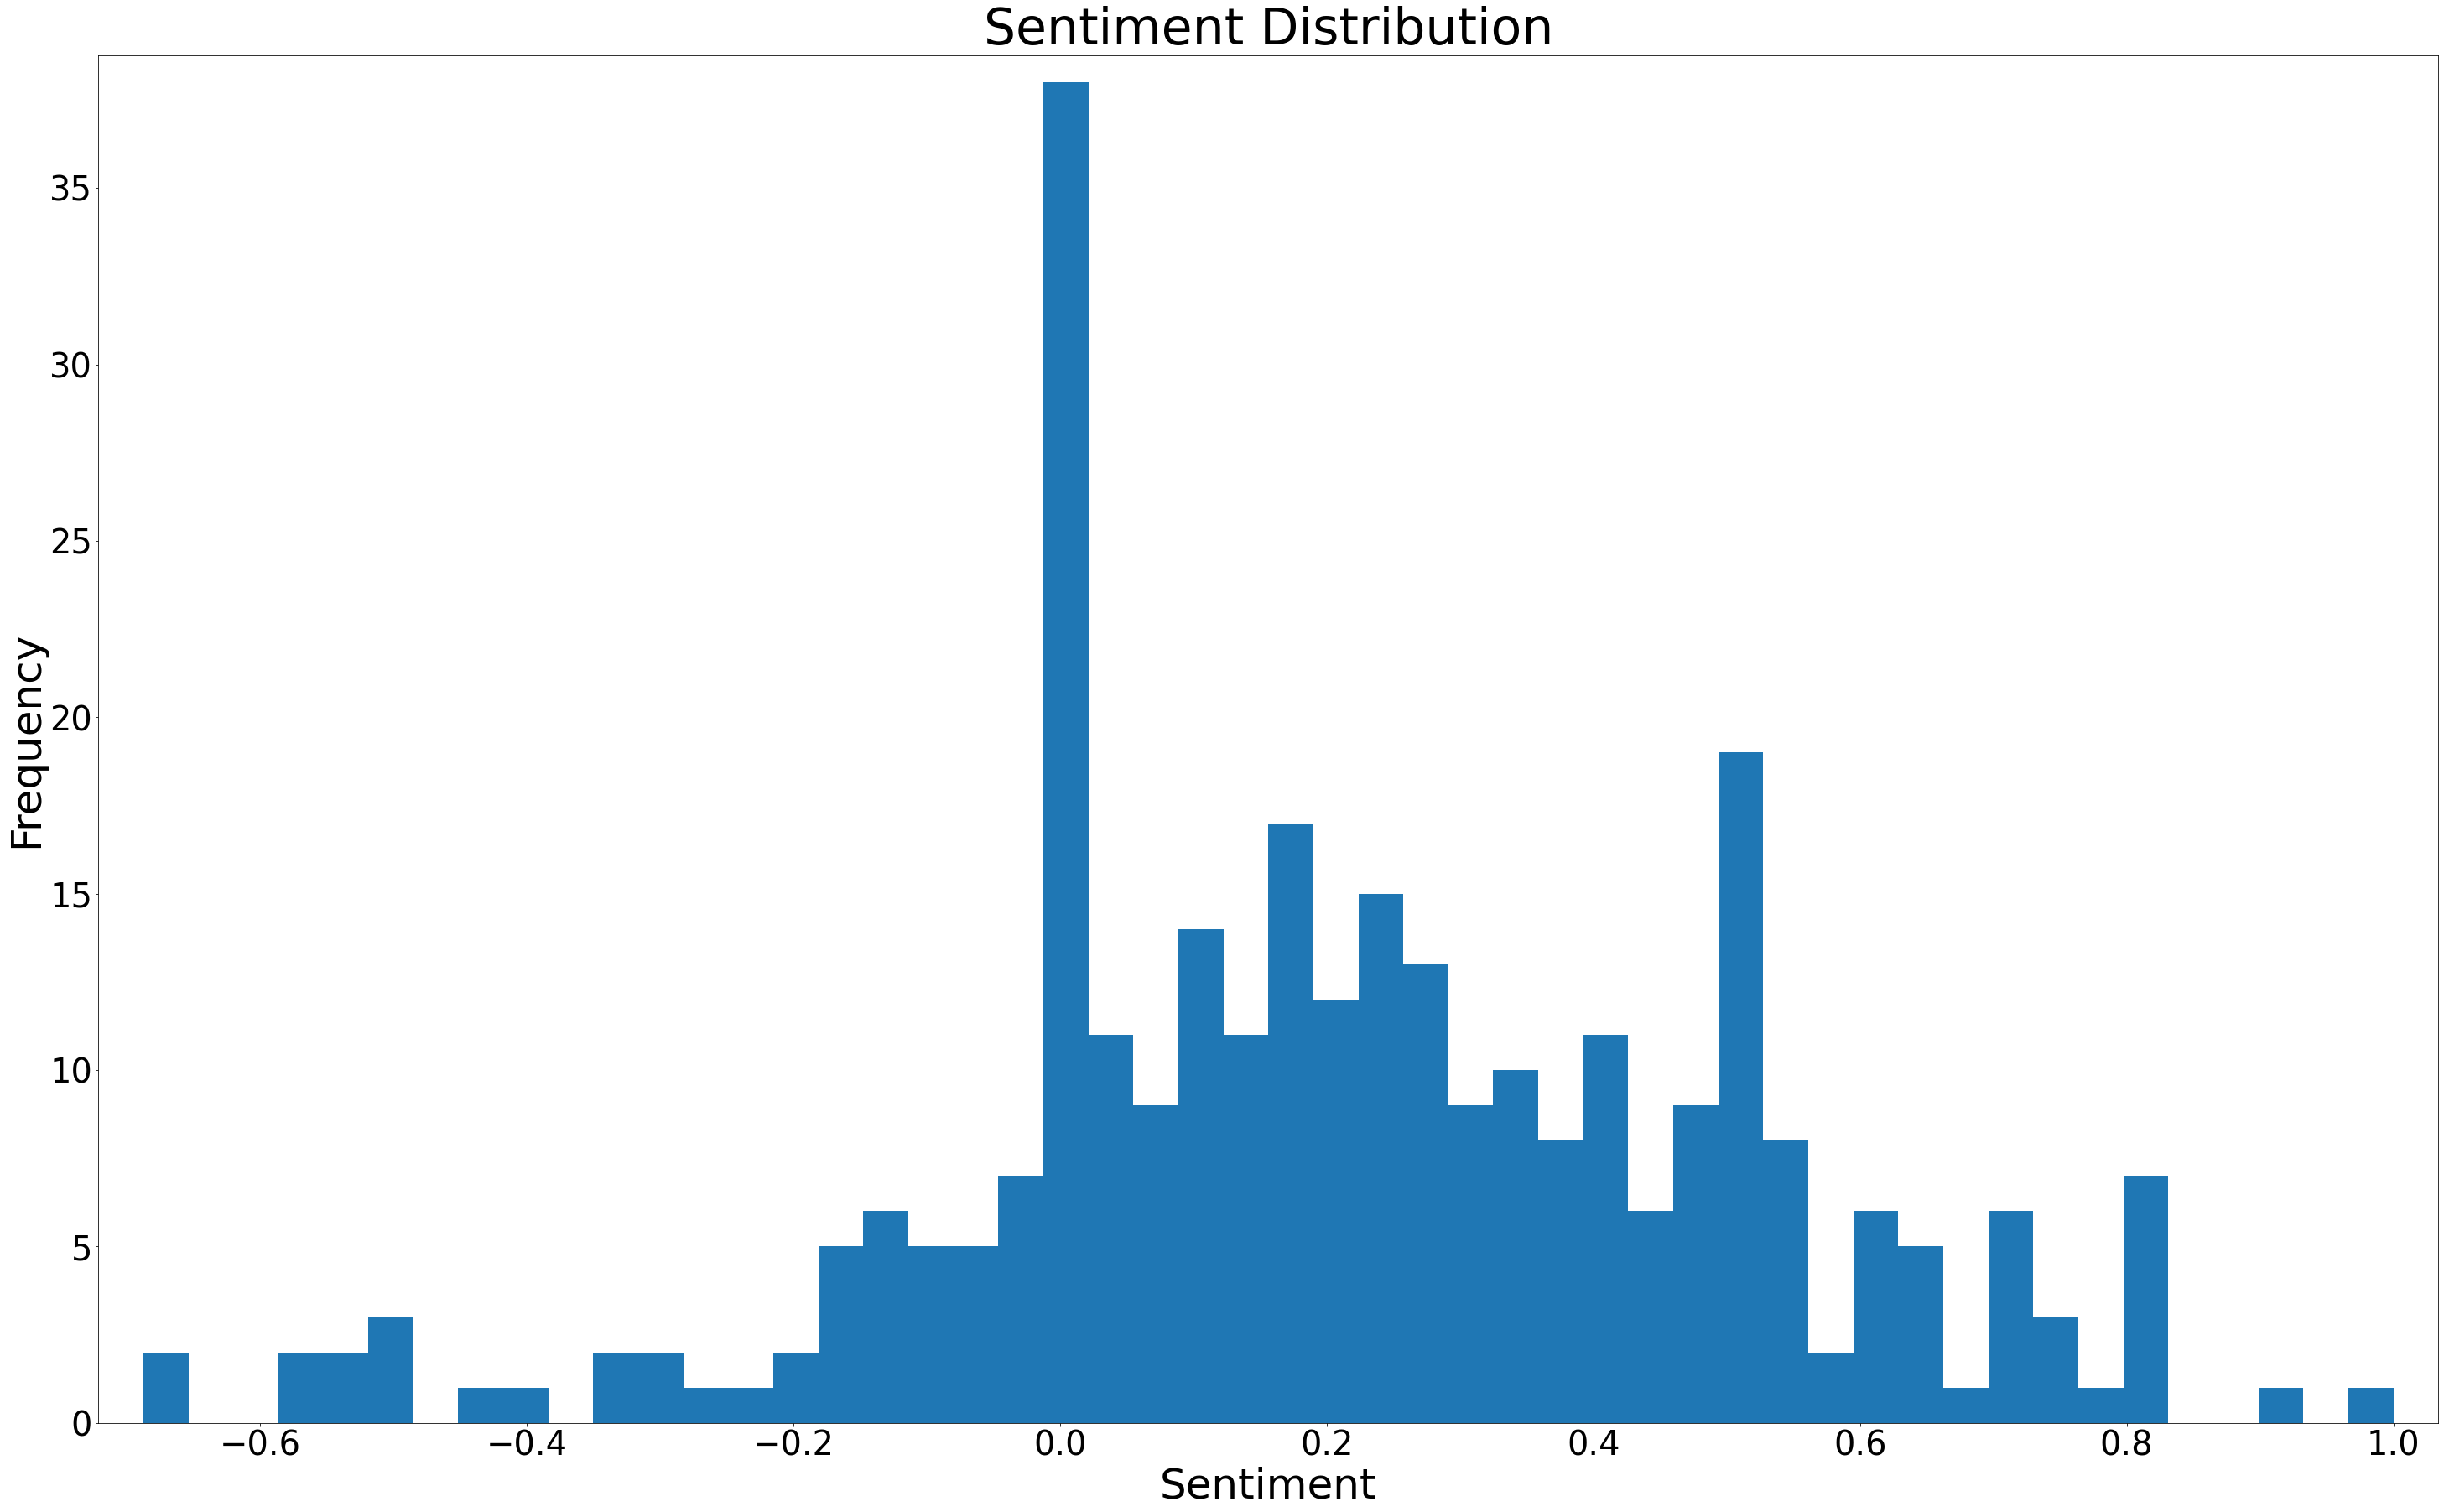

In [119]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

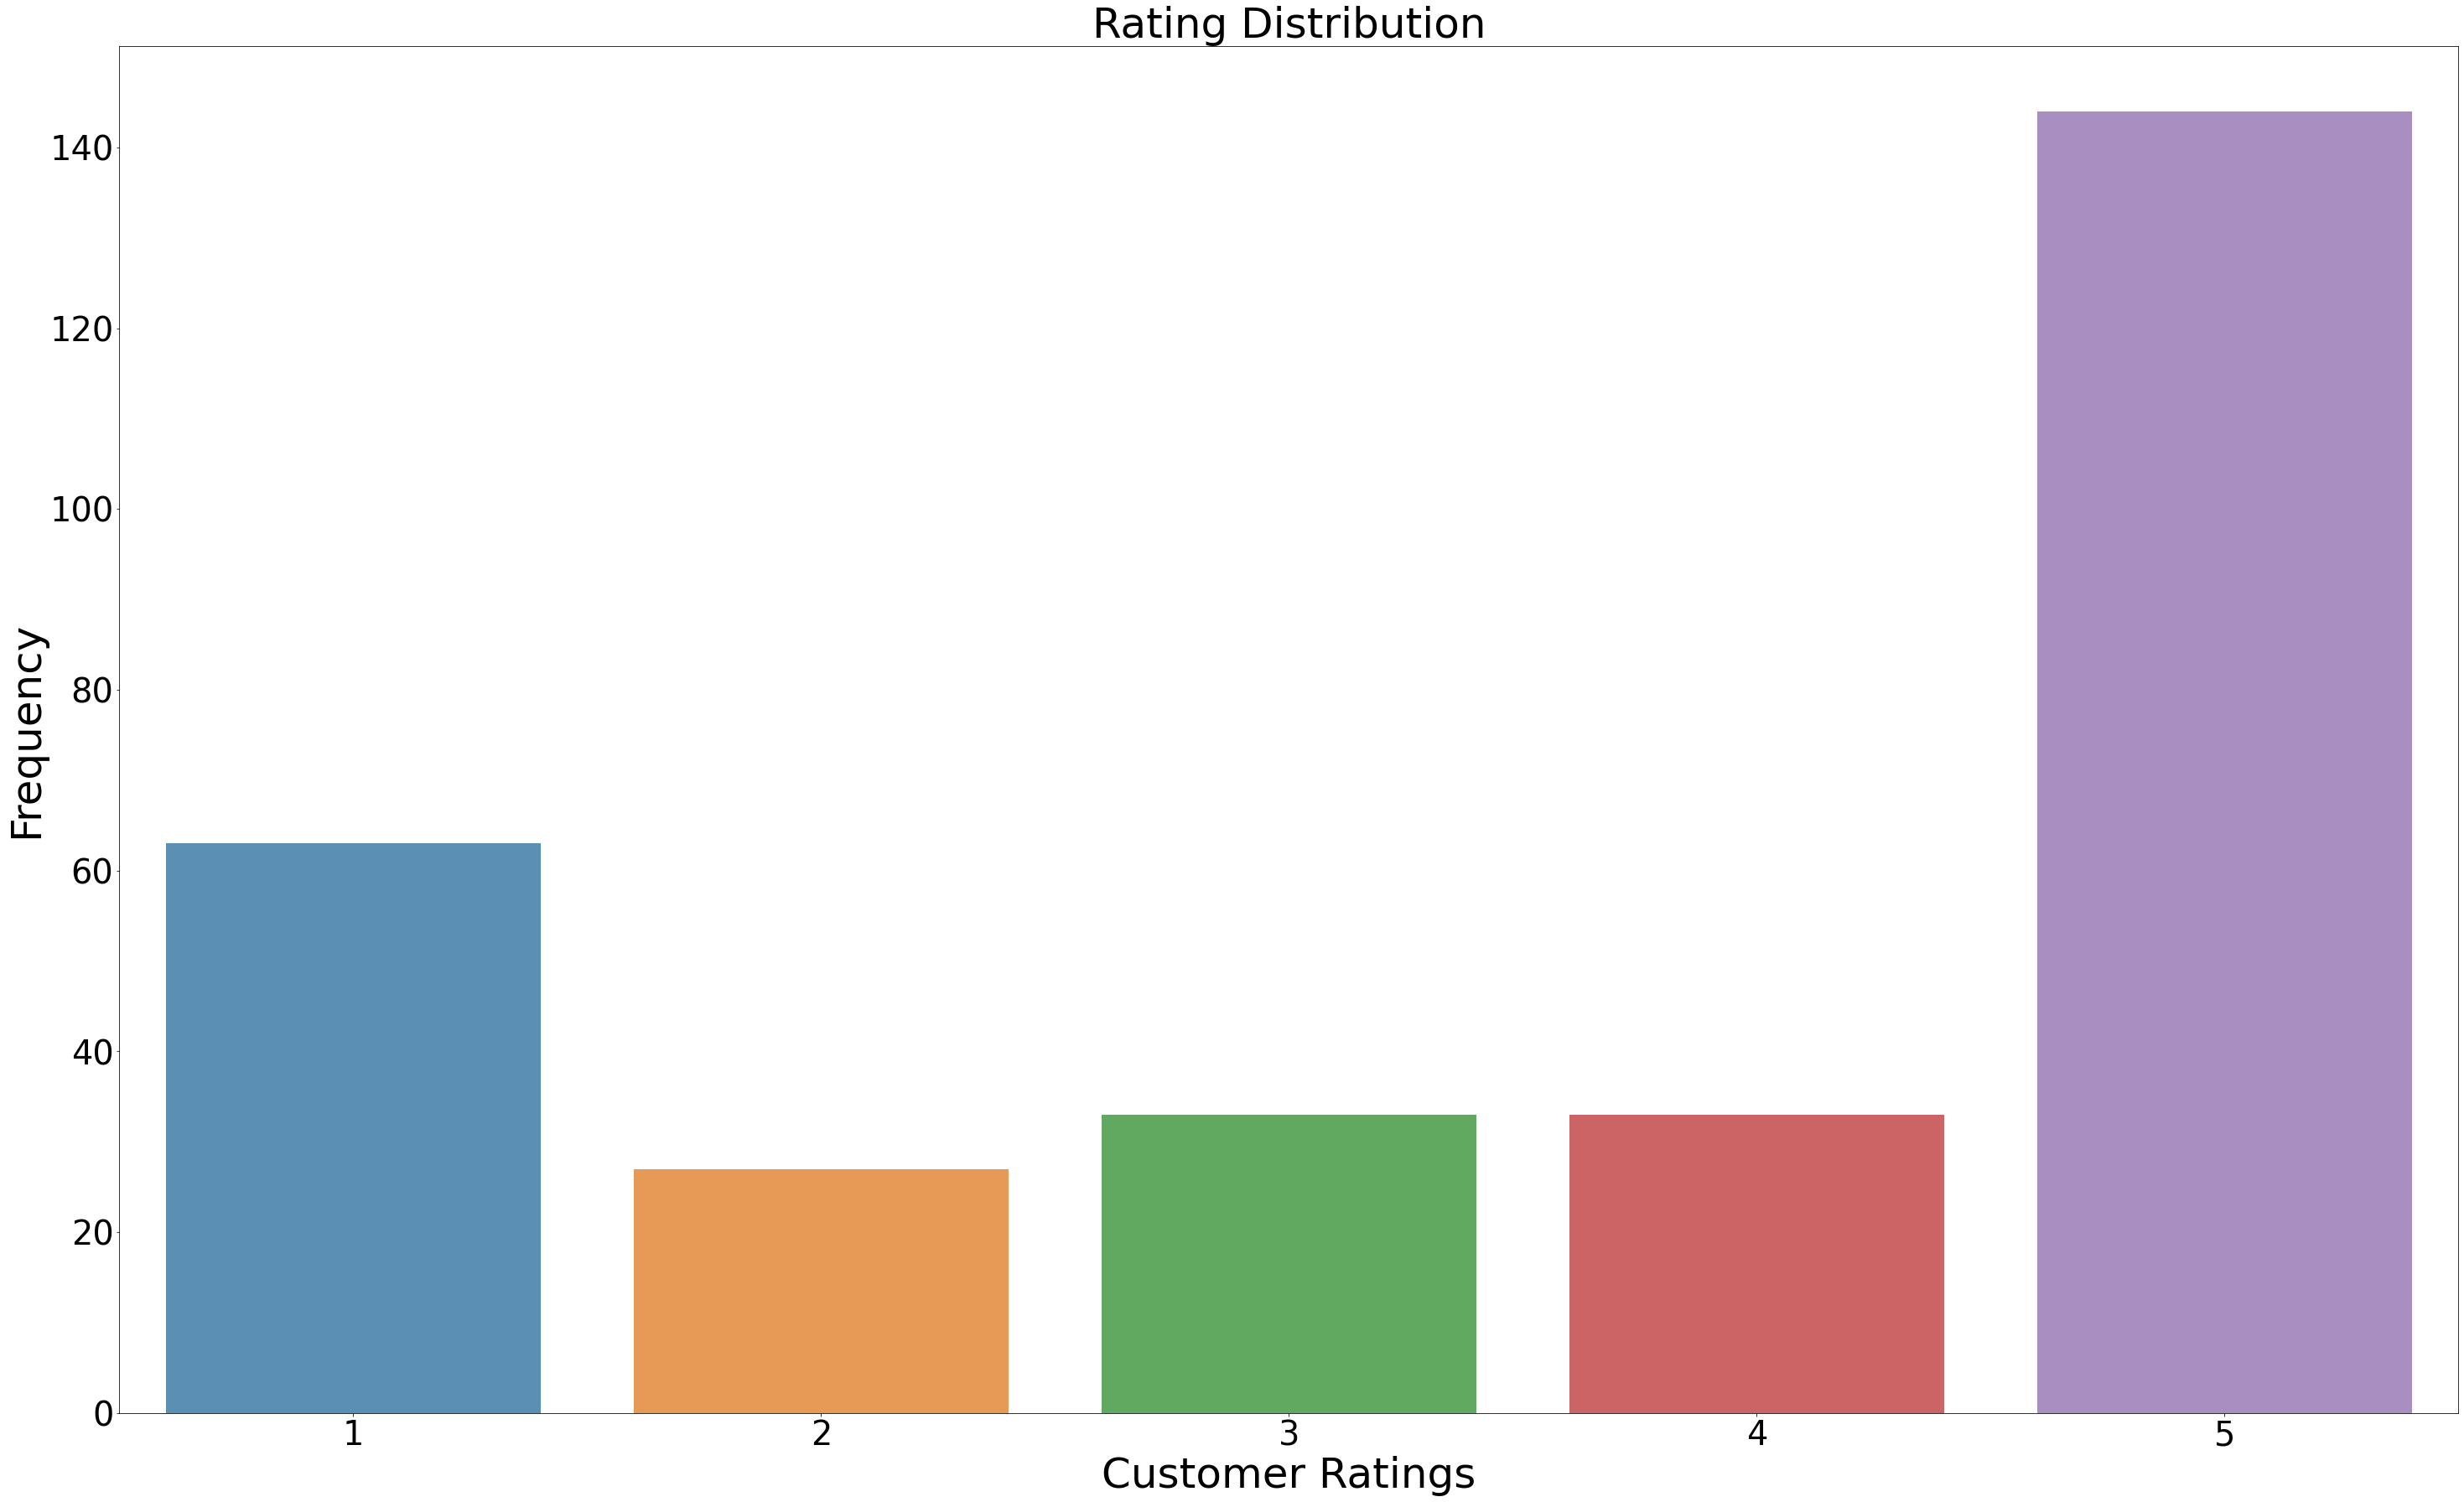

In [121]:
x_rating = df.category.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Customer Ratings', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='category'>

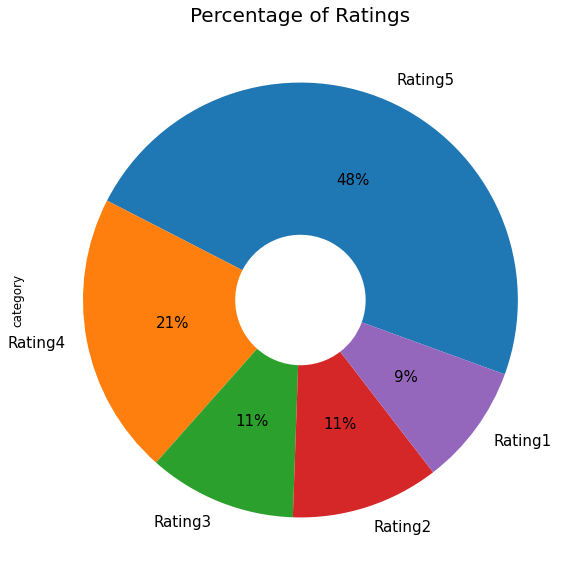

In [123]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.category.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,
                              textprops={'fontsize': 15})

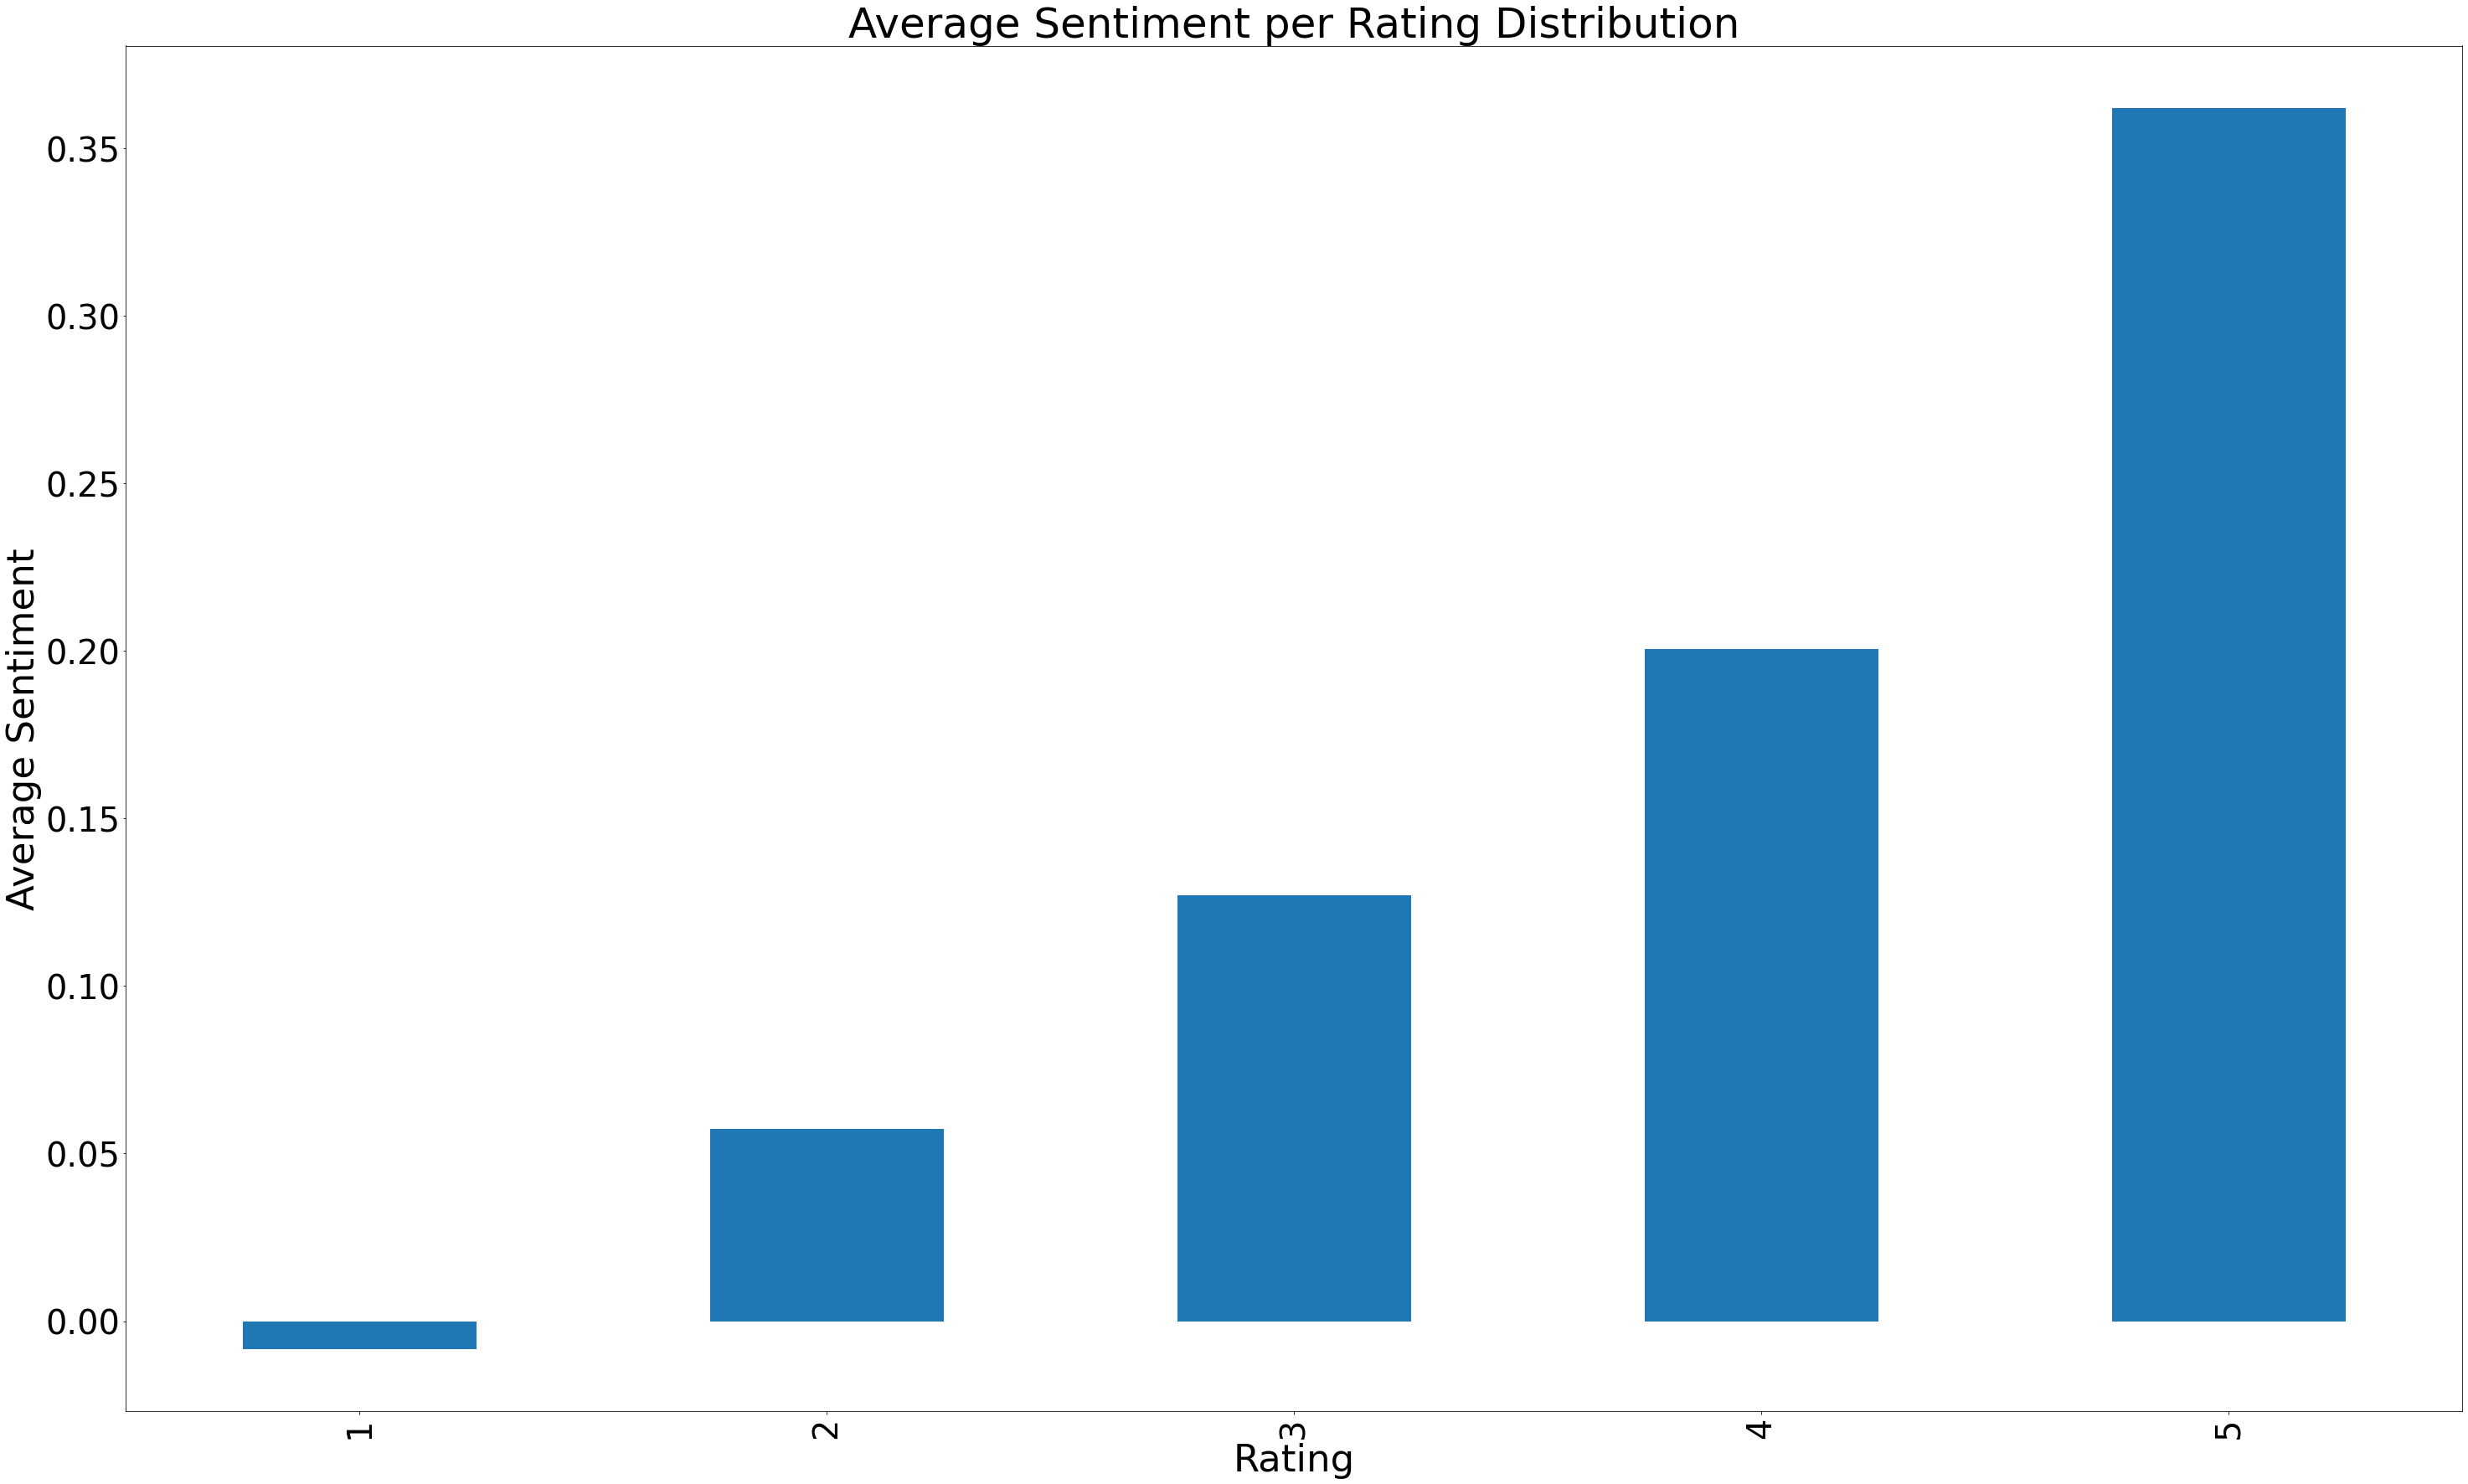

In [124]:
polarity_avg = df.groupby('category')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [125]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)

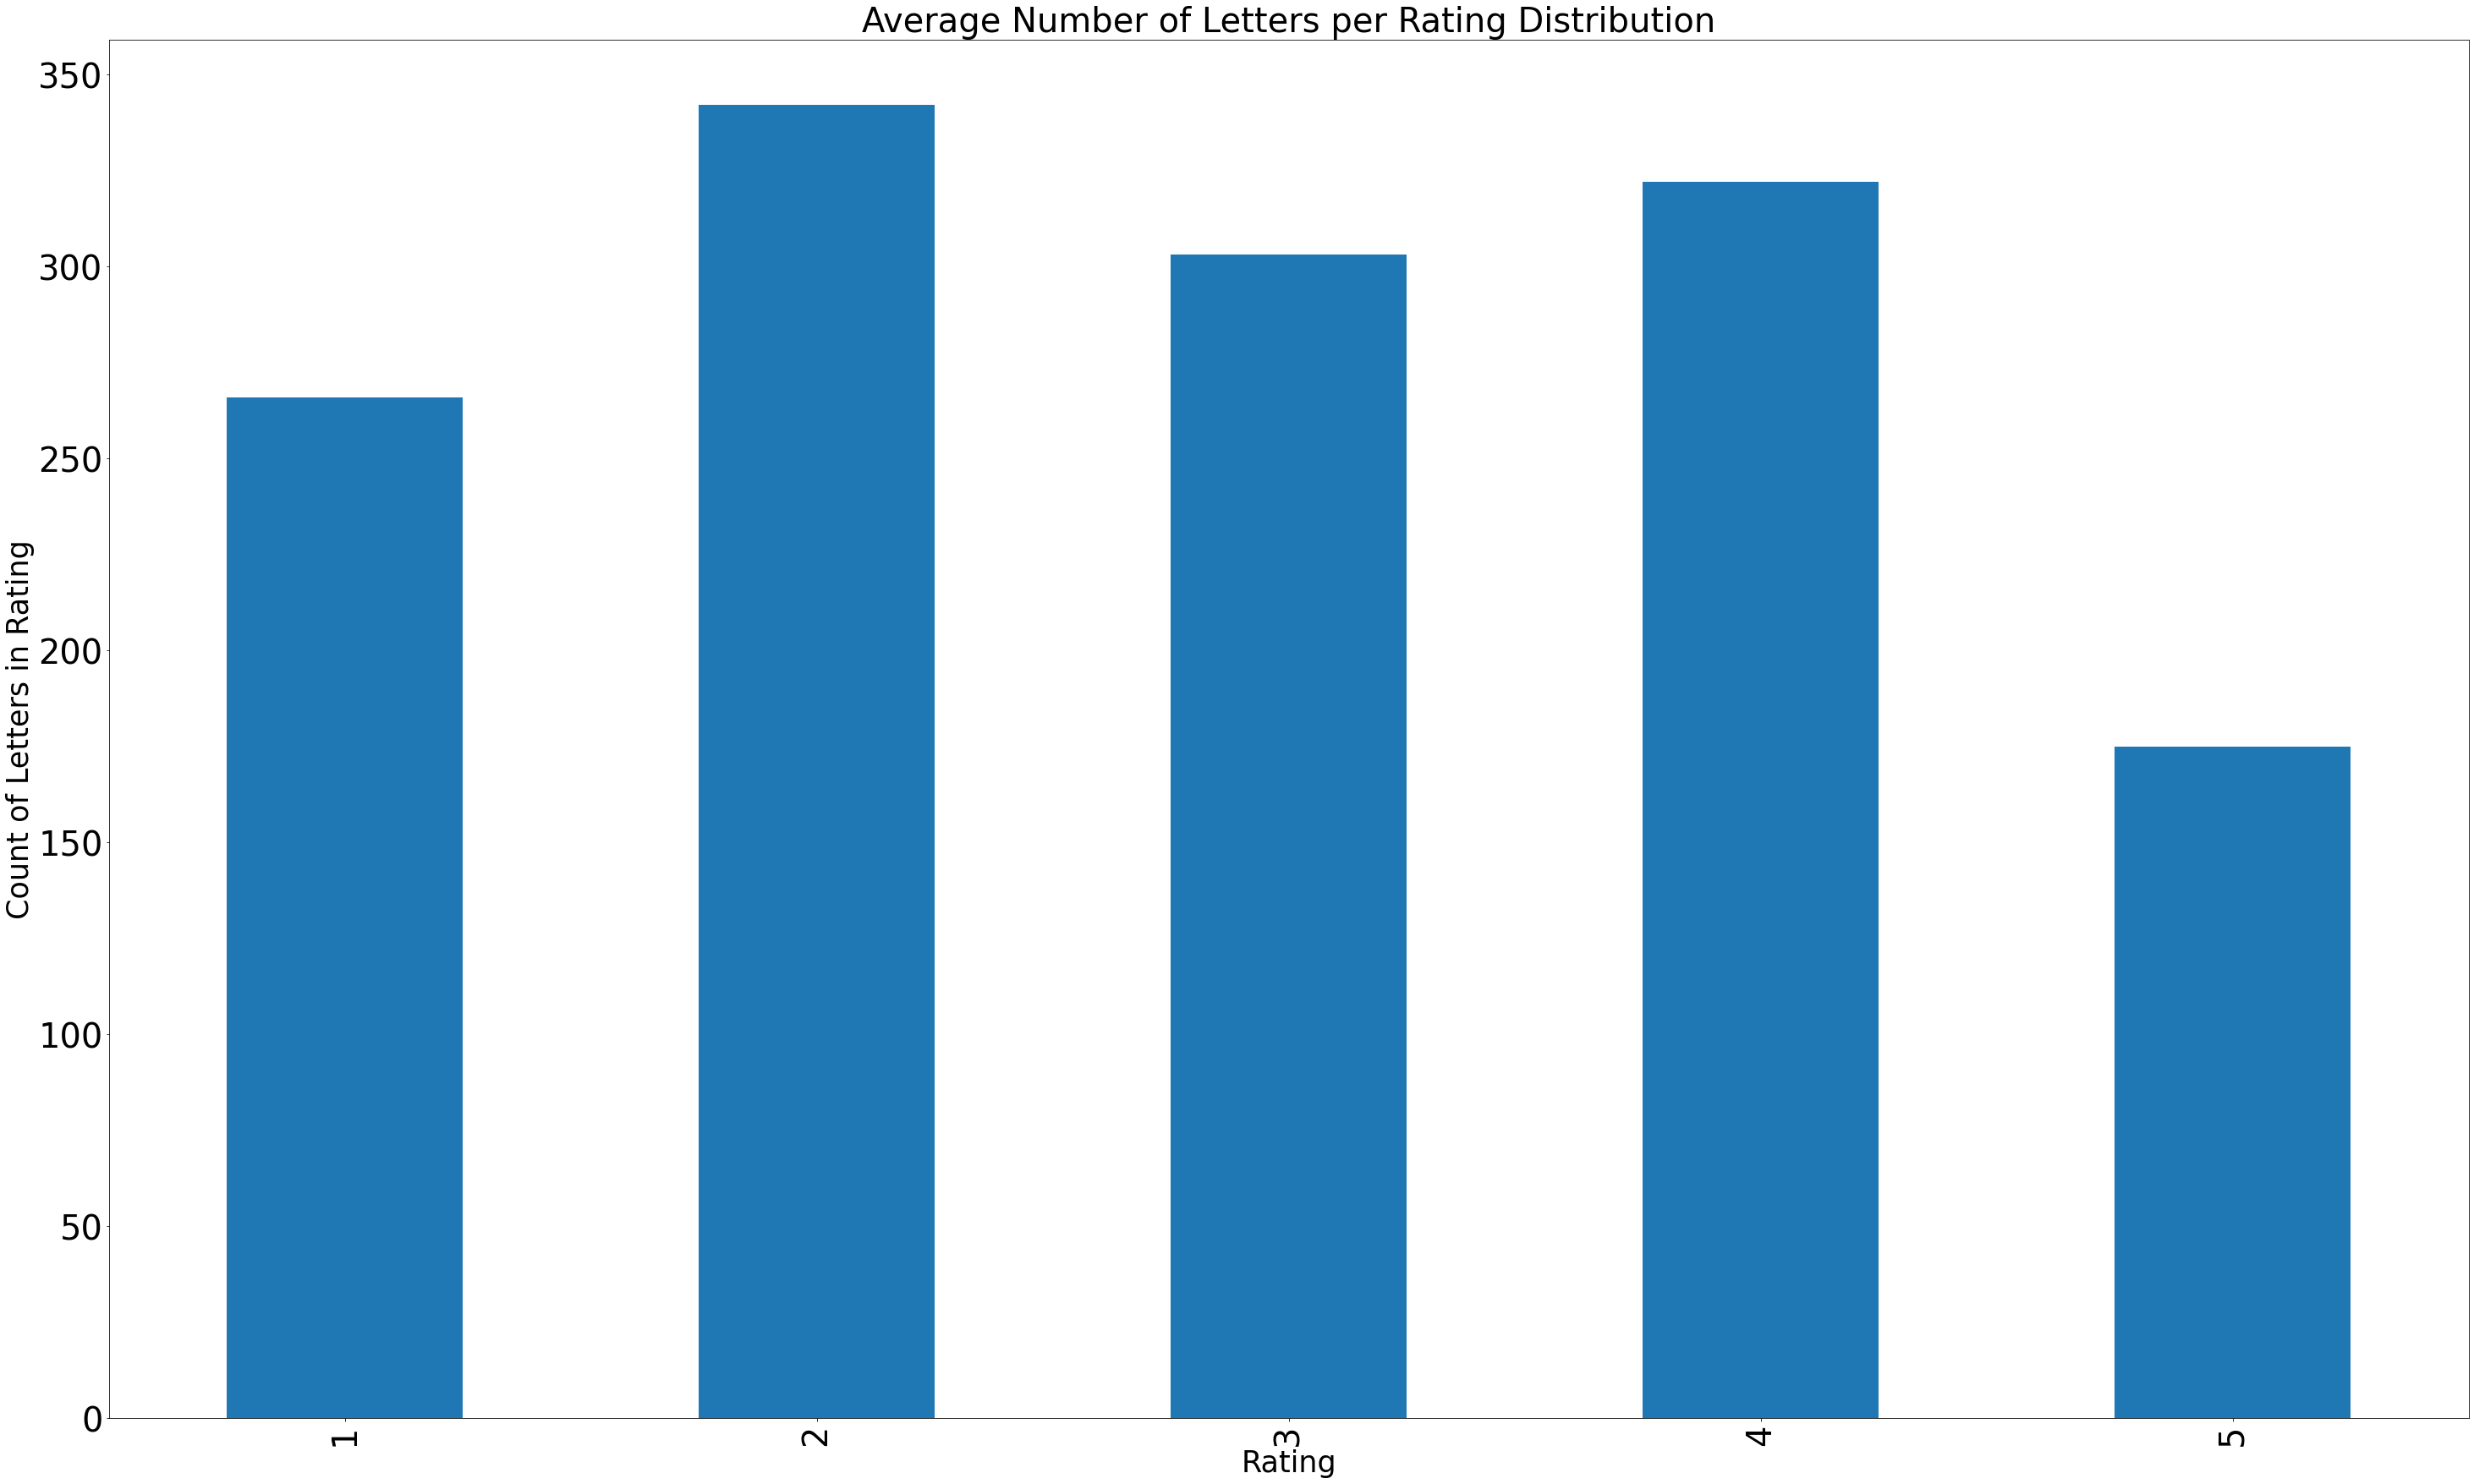

In [126]:
letter_avg = df.groupby('category')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

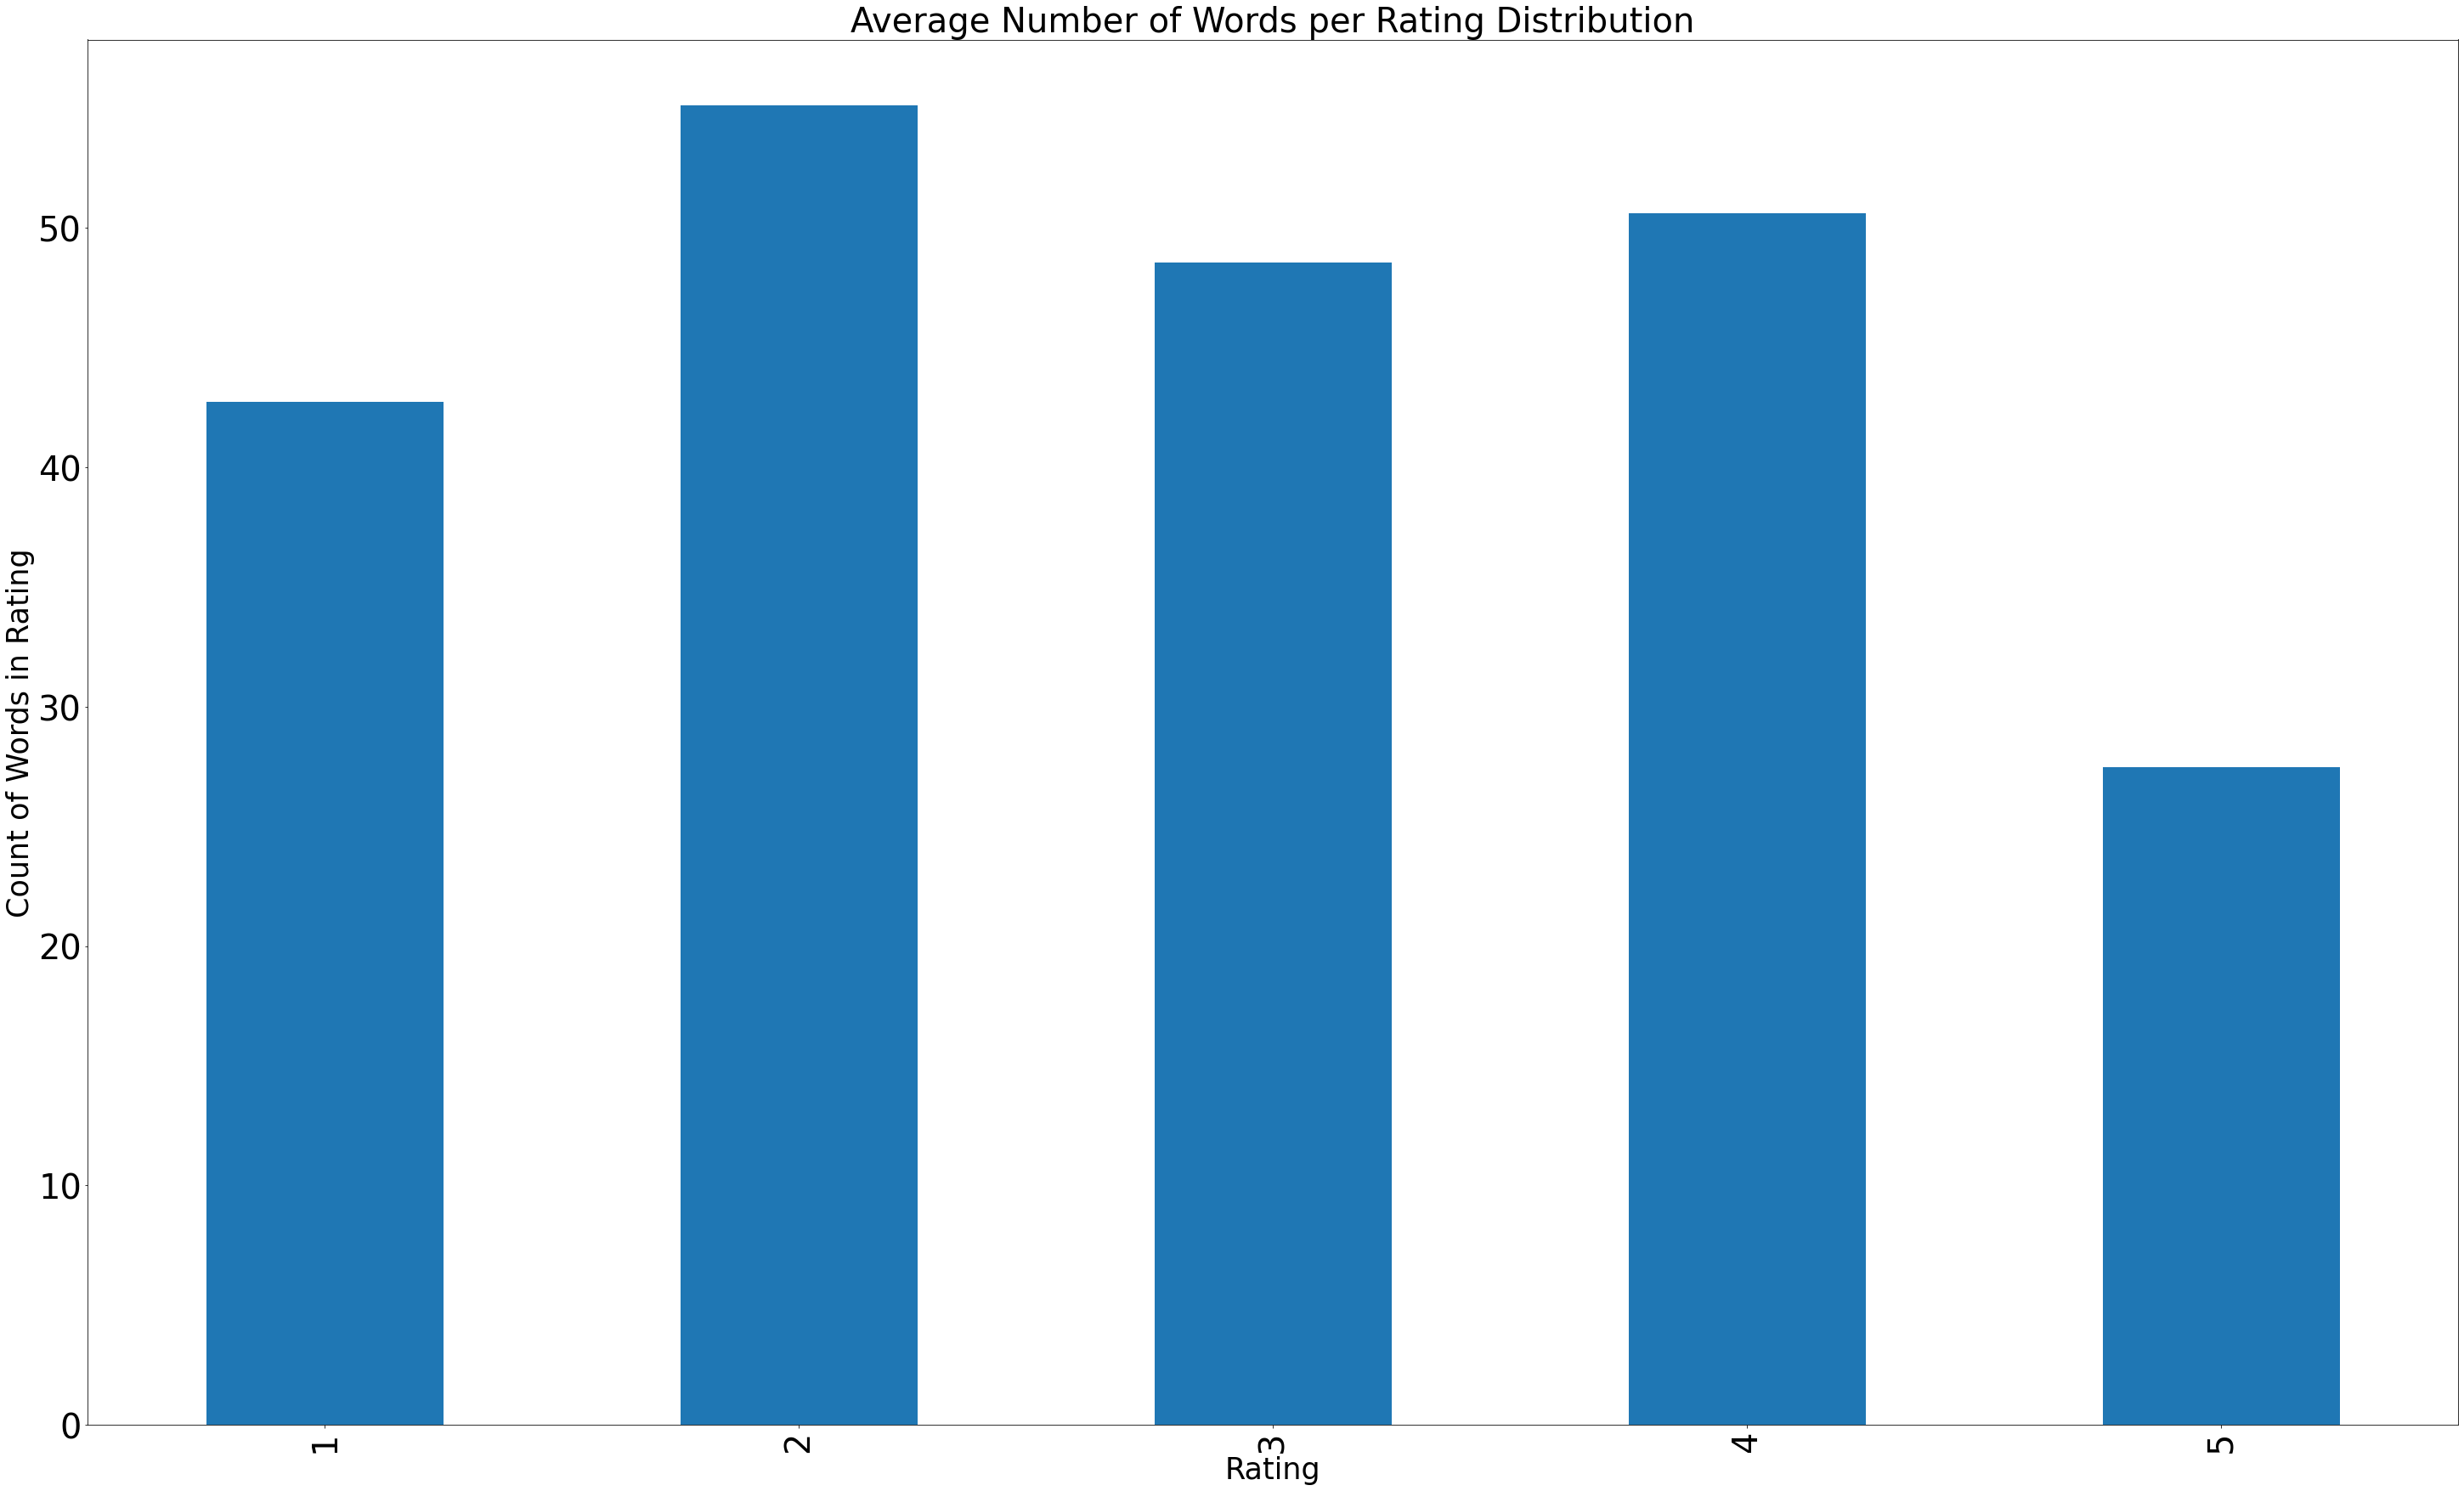

In [127]:
word_avg = df.groupby('category')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Rating Distribution', fontsize=40)
plt.show()

<AxesSubplot:>

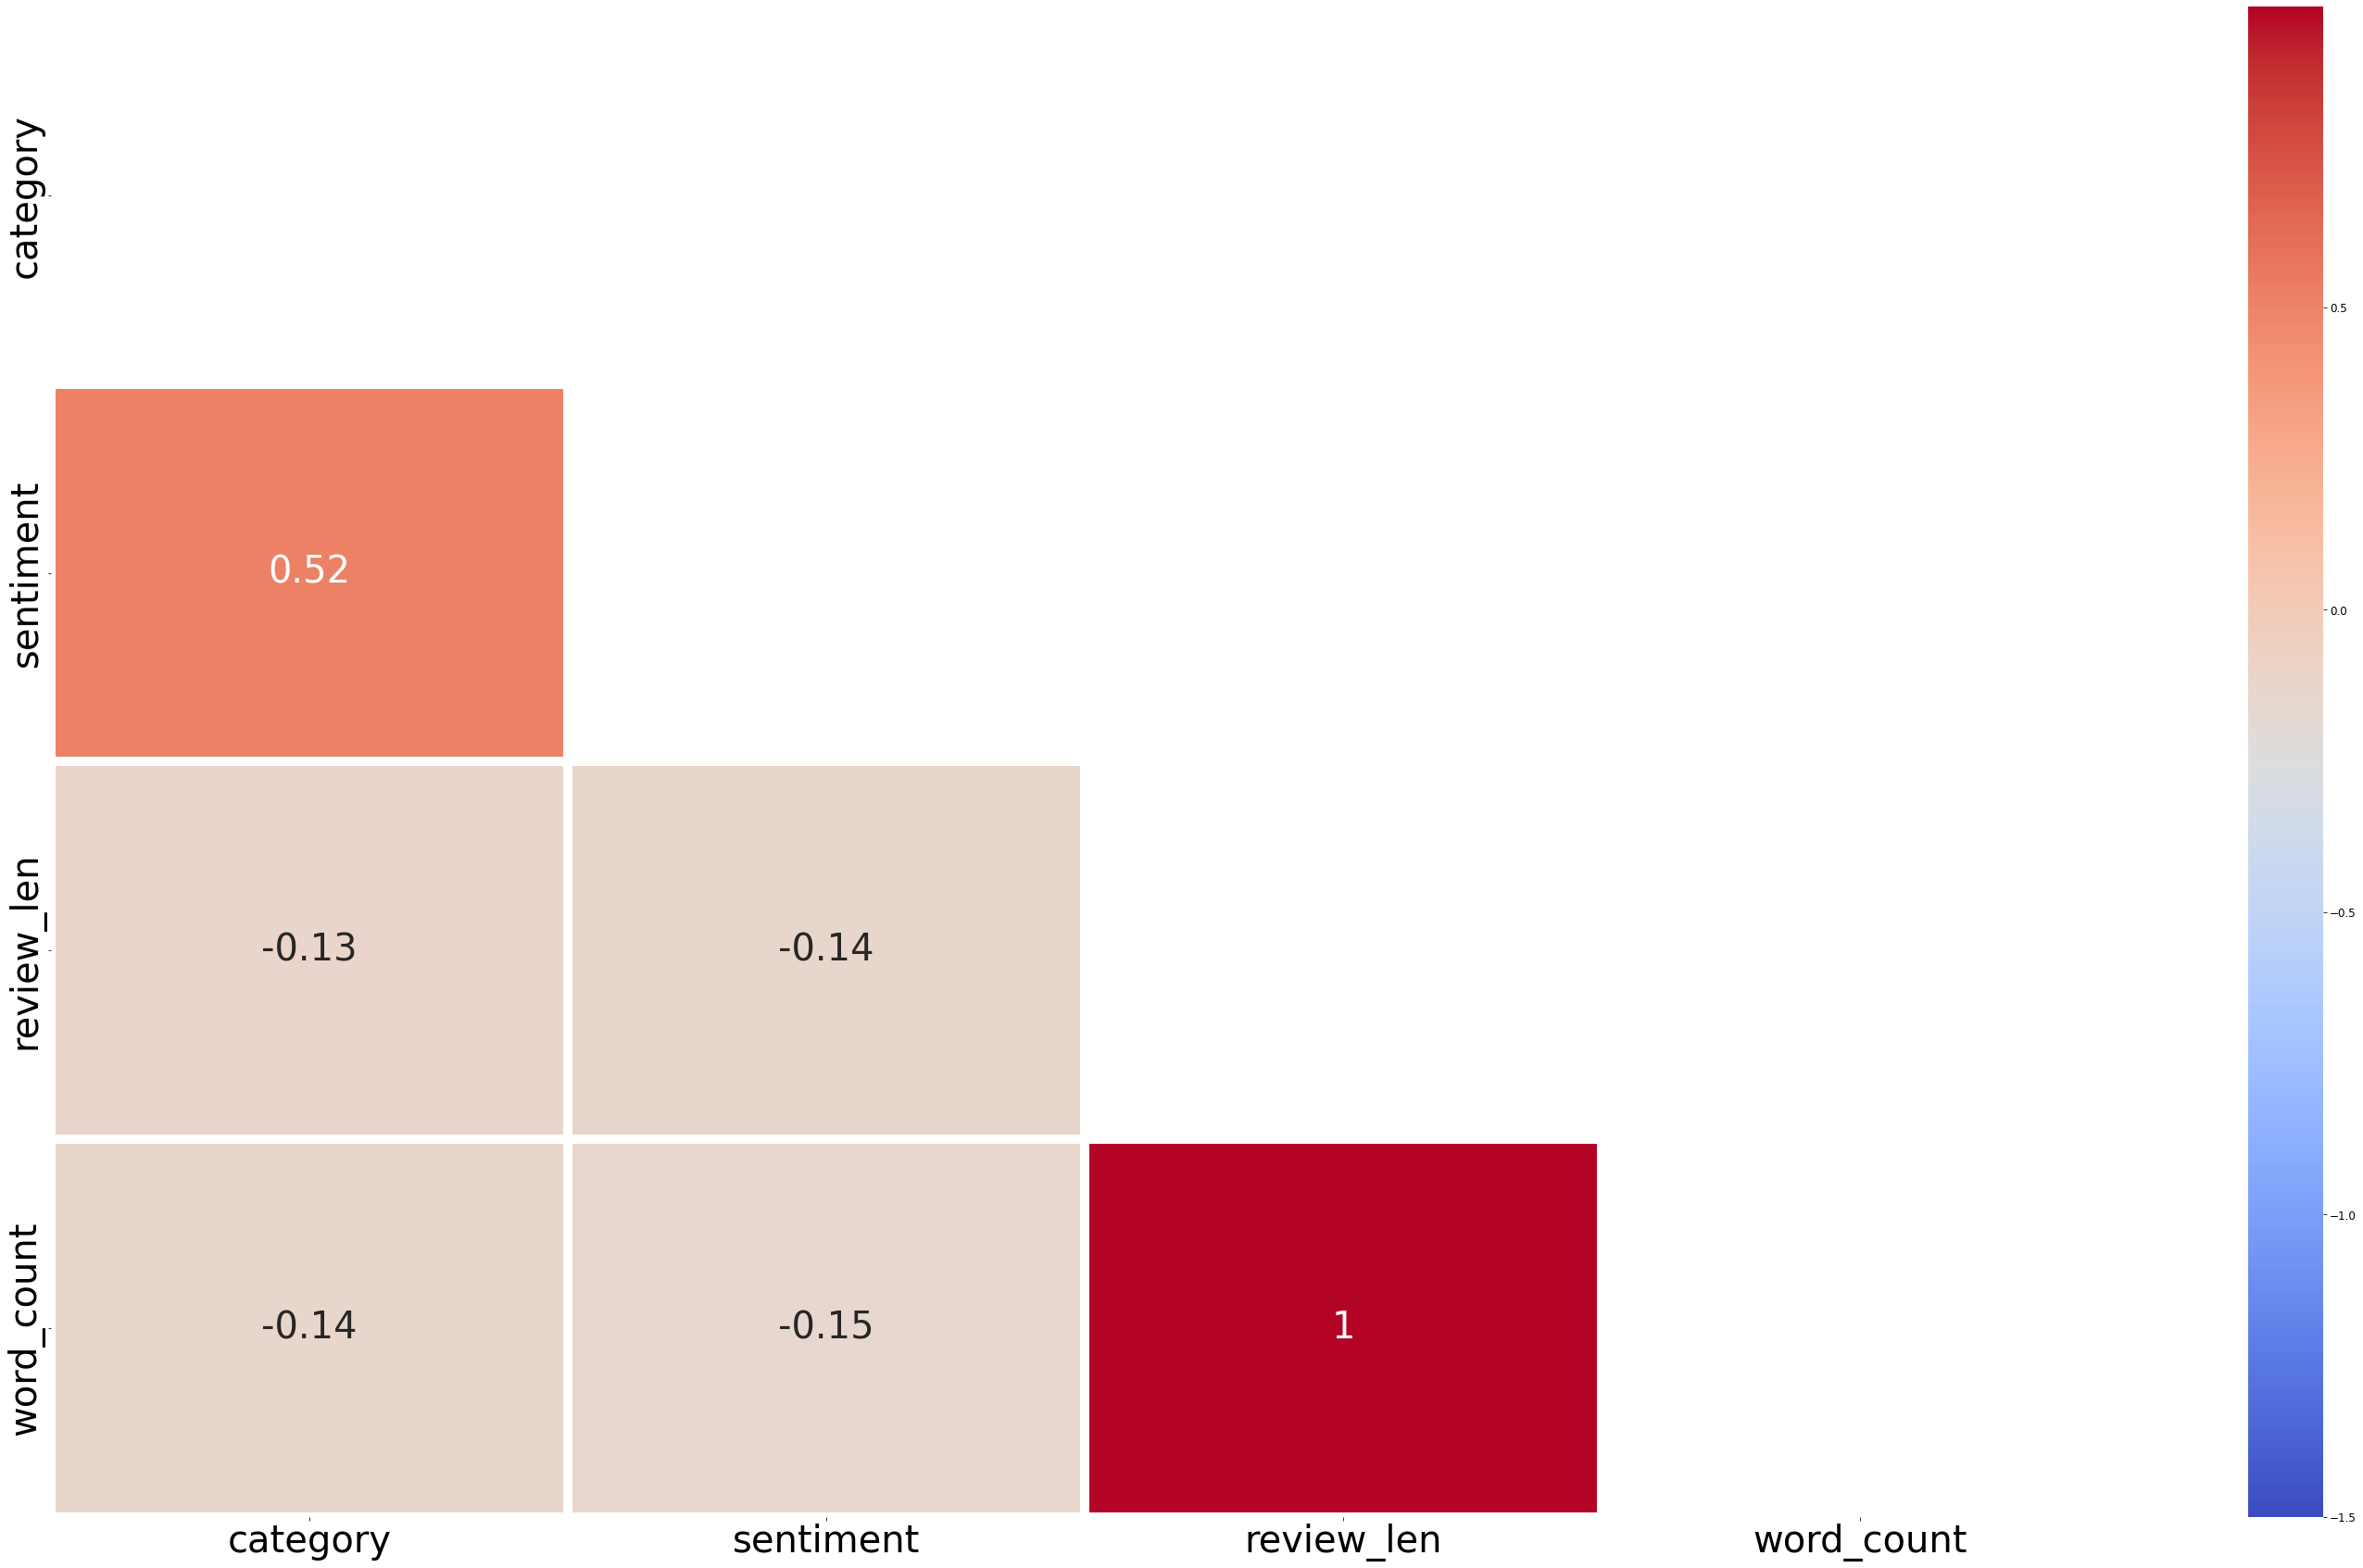

In [128]:
correlation = df[['category','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [129]:
#count vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,back,bad,battery,buy,camera,card,charge,come,could,day,...,say,screen,still,take,time,use,ve,well,work,would
0,0,0,0,1,0,0,0,0,0,0,...,1,3,0,0,0,0,0,1,3,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,1,2,0,0,2,3,1,...,1,0,0,1,6,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
297,2,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
298,0,0,1,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [130]:
#lda topic modelling
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
battery charge phone life day good use buy last camera
Topic 1:
phone good work screen like one back buy go samsung
Topic 2:
still samsung camera one take like love motorola much screen
Topic 3:
phone great love screen camera motorola quality really feature last
Topic 4:
phone well use camera samsung like feature card new old
Topic 5:
get screen make time work use take great issue bad
Topic 6:
phone samsung come work get day go new even purchase
Topic 7:
phone would time use could get issue buy love purchase
Topic 8:
s21 fast far go really good buy samsung even well
Topic 9:
phone quality new really good buy day great love ve


In [135]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  18.932324
6       0.648955  71.707100       2        1  17.546138
0      71.019684   9.971006       3        1  16.139837
7       3.785981  33.185135       4        1  14.840998
1     -42.666500  -9.222070       5        1  11.287458
3      -3.621689 -43.526516       6        1  10.234088
2      -3.632402  -4.171708       7        1   3.728134
5     -36.584400  35.804413       8        1   3.386681
8      44.391380  50.615383       9        1   3.147167
9      40.235809 -31.591665      10        1   0.757174, topic_info=       Term        Freq       Total Category  logprob  loglift
14      get  111.000000  111.000000  Default  30.0000  30.0000
33      s21   63.000000   63.000000  Default  29.0000  29.0000
36   screen   90.000000   90.000000  Default  28.0000  28.0000
34  samsung  131.000000  131.000000  Default  27.0000  27.0000
2   battery   90.000000   90.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
40      use    0.526657  122.602006  Topic10  -3.8067  -0.5668
4    camera    0.526657   96.396658  Topic10  -3.8067  -0.3263
21     like    0.526657   79.223904  Topic10  -3.8067  -0.1302
14      get    0.526657  111.906450  Topic10  -3.8067  -0.4755
34  samsung    0.526657  131.759810  Topic10  -3.8067  -0.6389

[401 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.314092   back
0         5  0.628184   back
0        10  0.026174   back
1         1  0.336218    bad
1         2  0.369840    bad
...     ...       ...    ...
43        8  0.034141   work
43       10  0.011380   work
44        1  0.263183  would
44        4  0.712143  would
44       10  0.015481  would

[196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 8, 2, 4, 3, 6, 9, 10])